In [126]:
import requests
import string
import pandas as pd
from bs4 import BeautifulSoup
import json
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [115]:
url = "https://weather-com.p.rapidapi.com/v3/wx/forecast/daily/10day"

querystring = {"geocode":"37.78,-122.41","units":"m","language":"en"}

headers = {
    'x-rapidapi-key': "b9659ca796msh5277b680db6a105p1cbbbdjsn3203d94c1da4",
    'x-rapidapi-host': "weather-com.p.rapidapi.com"
    }

response = requests.request("GET", url, headers=headers, params=querystring)

print(response.text)
a = response.json()

#a is a dictionary!

pretty_json = json.dumps(a, indent=4, sort_keys=True)

print(pretty_json)


{"calendarDayTemperatureMax":[15,19,18,17,16,20,22,21,18,16,16],"calendarDayTemperatureMin":[8,8,7,8,8,8,10,10,9,8,7],"dayOfWeek":["Thursday","Friday","Saturday","Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],"expirationTimeUtc":[1616672689,1616672689,1616672689,1616672689,1616672689,1616672689,1616672689,1616672689,1616672689,1616672689,1616672689],"moonPhase":["Waxing Gibbous","Waxing Gibbous","Waxing Gibbous","Full Moon","Waning Gibbous","Waning Gibbous","Waning Gibbous","Waning Gibbous","Waning Gibbous","Waning Gibbous","Last Quarter"],"moonPhaseCode":["WXG","WXG","WXG","F","WNG","WNG","WNG","WNG","WNG","WNG","LQ"],"moonPhaseDay":[11,12,13,15,16,17,18,19,20,21,22],"moonriseTimeLocal":["2021-03-25T16:07:09-0700","2021-03-26T17:17:33-0700","2021-03-27T18:29:53-0700","2021-03-28T19:42:17-0700","2021-03-29T20:56:27-0700","2021-03-30T22:11:32-0700","2021-03-31T23:26:32-0700","","2021-04-02T00:40:37-0700","2021-04-03T01:49:02-0700","2021-04-04T02:50:20-0

In [116]:
#creating a new dictionary!
data={}
#Creating Tempature list
data["Temperature"]=2*a["calendarDayTemperatureMax"]

#These two loops helping to combine day and night temperatures
j=0
for i in range(len(a["calendarDayTemperatureMax"])):
    data["Temperature"][j]=a["calendarDayTemperatureMax"][i]
    j=j+2


k=0
for z in range(len(a["calendarDayTemperatureMin"])):
    data["Temperature"][k+1]=a["calendarDayTemperatureMin"][z]
    k=k+2

index=a["daypart"][0]["daypartName"]
data["Description"]=a["daypart"][0]["wxPhraseLong"]
data["Narrative"]=a["daypart"][0]["narrative"]

#creating dates
data["Date"]=list(np.repeat(np.arange('2021-03-21', '2021-04-01', dtype='datetime64[D]'),2))
#Creating data frame
df=pd.DataFrame(data=data,index=index)
df


,Temperature,Description,Narrative,Date
Today,15,Mostly Sunny/Wind,Partly cloudy. Windy during the morning. High ...,2021-03-21
Tonight,8,Clear,Clear skies. Low 8C. Winds NW at 15 to 30 km/h.,2021-03-21
Tomorrow,19,Sunny,Sunny skies. High 19C. Winds NNW at 15 to 30 k...,2021-03-22
Tomorrow night,8,Clear,Clear. Low 7C. Winds SW at 15 to 25 km/h.,2021-03-22
Saturday,18,Sunny,Sunny skies. High 18C. SSE winds shifting to W...,2021-03-23
Saturday night,7,Mostly Clear,A mostly clear sky. Low 8C. Winds SW at 10 to ...,2021-03-23
Sunday,17,Partly Cloudy,Some clouds in the morning will give way to ma...,2021-03-24
Sunday night,8,Mostly Clear,A mostly clear sky. Low 8C. Winds W at 15 to 2...,2021-03-24
Monday,16,Sunny,Sunny skies. High around 15C. Winds WNW at 25 ...,2021-03-25
Monday night,8,Clear,A mostly clear sky. Low 8C. Winds NNW at 15 to...,2021-03-25


Text(0.5, 1.0, 'Forecast')

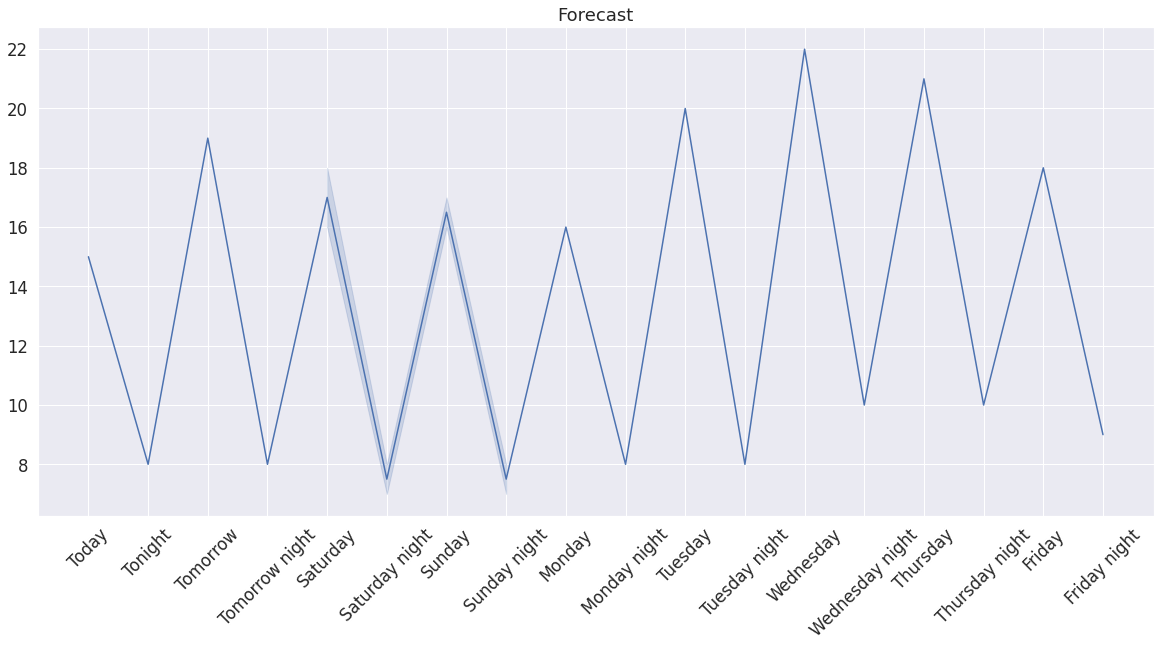

In [137]:
#plotting
size=(20, 9)
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=size)
ax = sns.lineplot(x=index,y=data["Temperature"],
                   data=data,palette="Set2")
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Forecast')


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=79673256-d468-4dc3-bcd4-af2c4cf3525d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>